<a href="https://colab.research.google.com/github/fasih245/AI-and-Machine-Lerning/blob/main/Titanic_Developer's_Hub.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1> Performing EDA

<h4>Importing Libraries

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


<h4> Importing dataset

In [ ]:
df = pd.read_csv("/content/train.csv")

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
5,6,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,Q


<h4> Hnadling Missing and Duplicate values

In [ ]:
# Fill missing Age with median
df['Age'].fillna(df['Age'].median(), inplace=True)

# Fill missing Embarked with mode
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Drop Cabin due to too many missing values
df.drop(columns=['Cabin'], inplace=True)

# Drop duplicates
df.drop_duplicates(inplace=True)

<ipython-input-5-67839f56c317>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
<ipython-input-5-67839f56c317>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

<h4> Removing Outliers


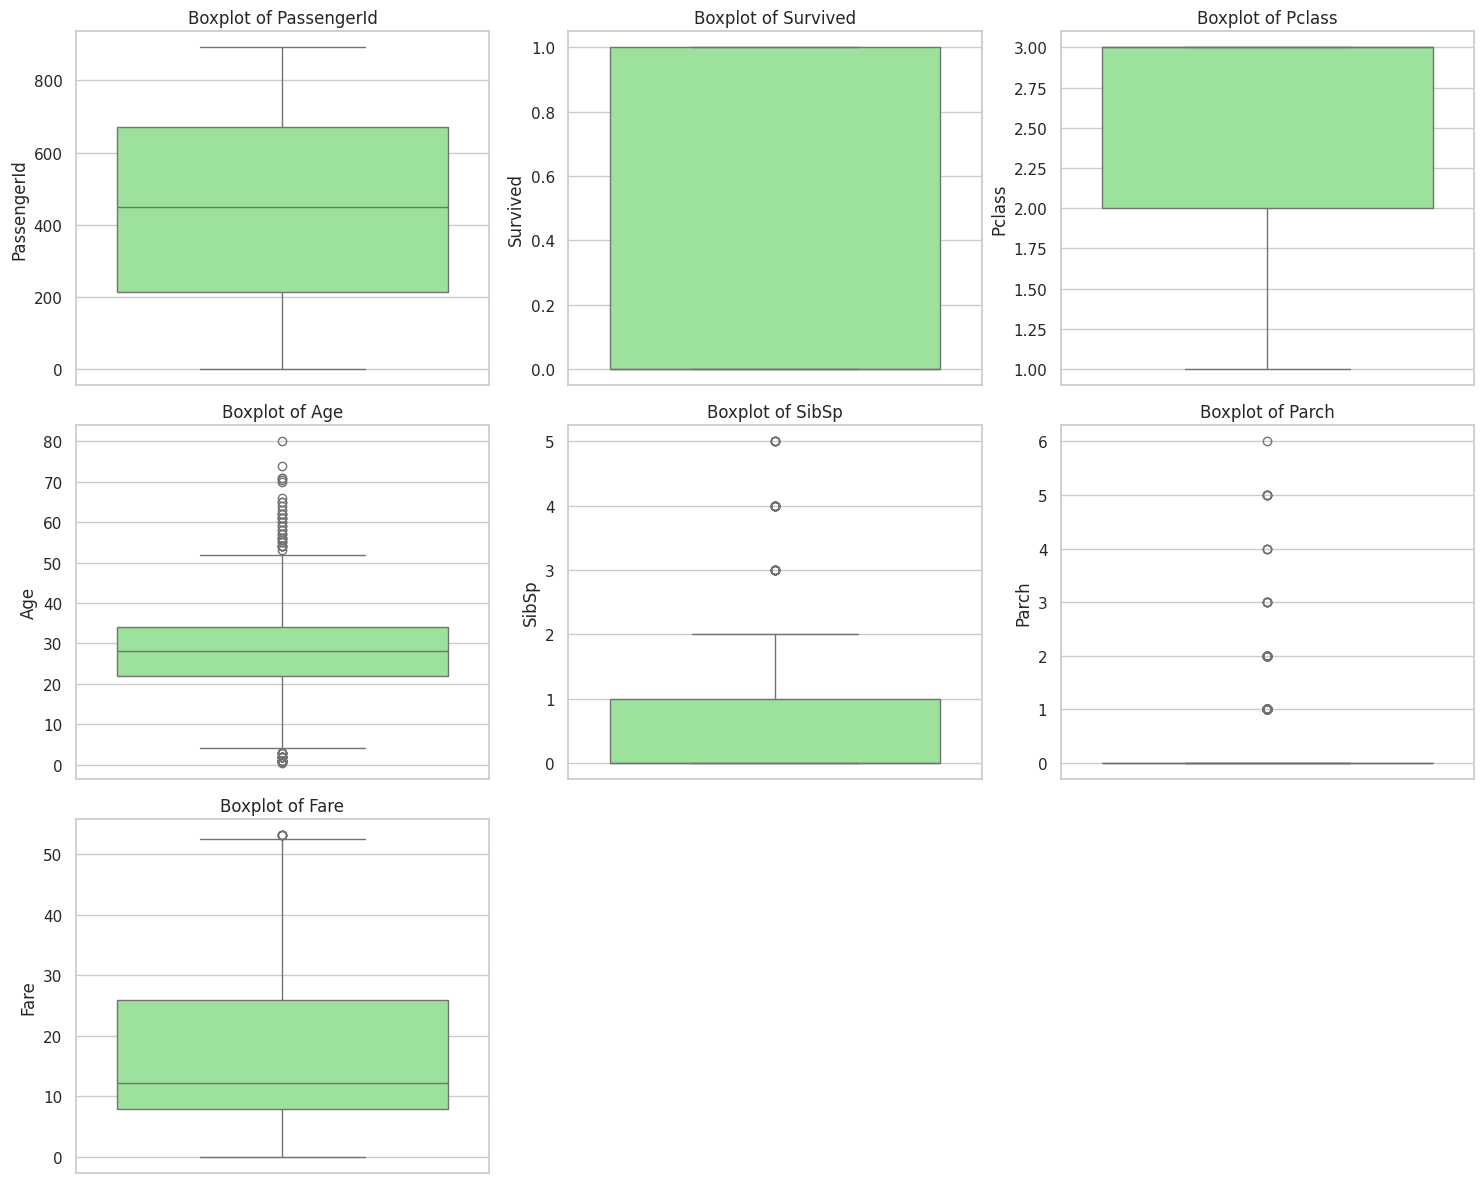

In [ ]:
import math


# Filter numeric columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Determine grid size
n_cols = 3
n_plots = len(numeric_cols)
n_rows = math.ceil(n_plots / n_cols)

# Create subplots
plt.figure(figsize=(5 * n_cols, 4 * n_rows))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.boxplot(y=df[col], color='lightgreen')
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()


In [ ]:
# Remove outliers in Fare using IQR method
Q1 = df['Fare'].quantile(0.25)
Q3 = df['Fare'].quantile(0.75)
IQR = Q3 - Q1
df = df[(df['Fare'] >= Q1 - 1.5 * IQR) & (df['Fare'] <= Q3 + 1.5 * IQR)]


<h3> Visualization

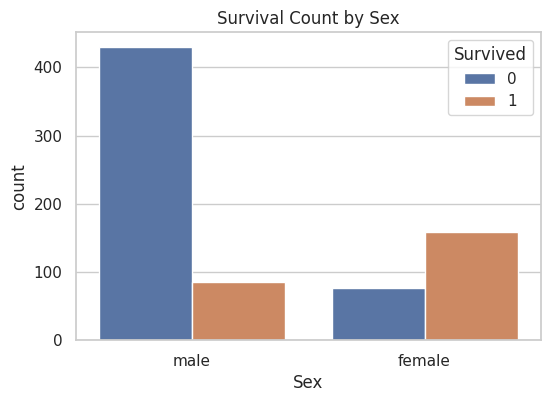

In [ ]:
sns.set(style="whitegrid")

# 1. Survival by Sex
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Sex', hue='Survived')
plt.title('Survival Count by Sex')
plt.show()

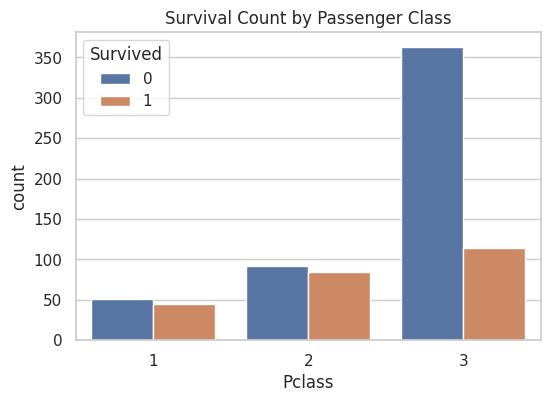

In [ ]:
# 2. Survival by Pclass
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Pclass', hue='Survived')
plt.title('Survival Count by Passenger Class')
plt.show()


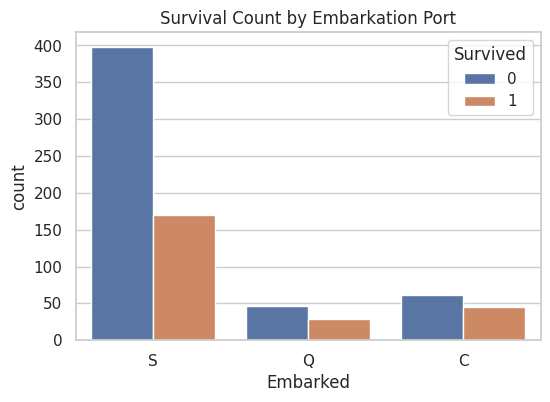

In [ ]:
# 3. Survival by Embarked
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Embarked', hue='Survived')
plt.title('Survival Count by Embarkation Port')
plt.show()

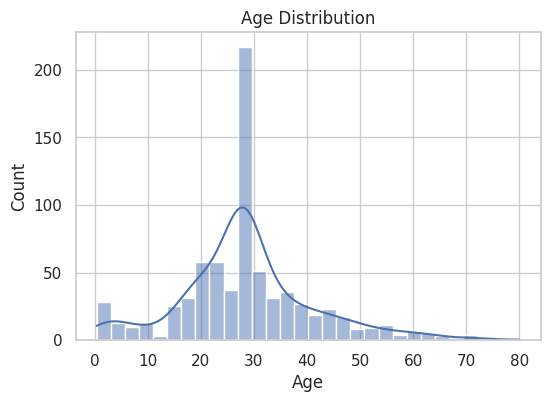

In [ ]:
# 4. Age Distribution
plt.figure(figsize=(6, 4))
sns.histplot(df['Age'], kde=True, bins=30)
plt.title('Age Distribution')
plt.show()

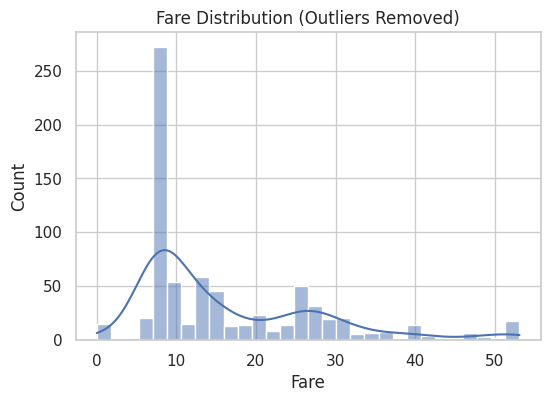

In [ ]:
# 5. Fare Distribution
plt.figure(figsize=(6, 4))
sns.histplot(df['Fare'], kde=True, bins=30)
plt.title('Fare Distribution (Outliers Removed)')
plt.show()


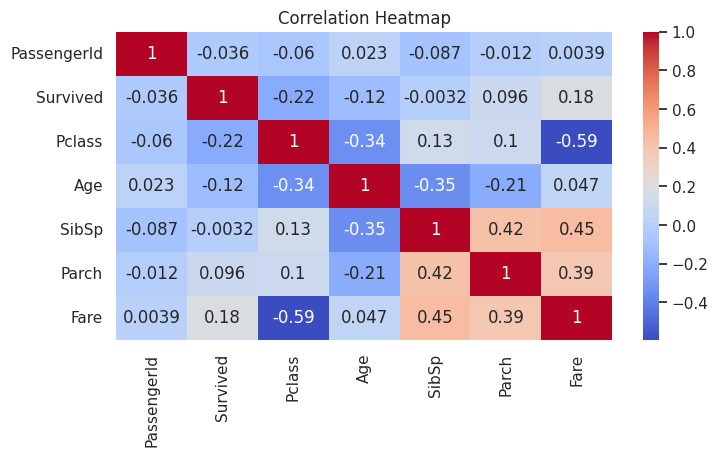

In [ ]:
# 6. Correlation Heatmap
plt.figure(figsize=(8, 4))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

<h1>🔍 Summary of EDA Insights

### 1. Gender and Survival
- A significantly higher proportion of **females survived** compared to males.
- Most **males did not survive**, especially in lower classes.

### 2. Passenger Class (Pclass)
- **First-class passengers** had a much higher survival rate.
- **Third-class passengers** had the lowest survival rate overall.

### 3. Age Distribution
- Most passengers were between **20 and 40 years old**.
- There were a few **infants and elderly** passengers, some of whom survived at higher rates.

### 4. Fare Distribution
- Fare had a **long right tail**, indicating a few passengers paid very high fares.
- First-class passengers generally paid more and survived more often.

### 5. Embarkation Port
- **Port 'C' (Cherbourg)** had the highest survival rate.
- Most passengers boarded at **'S' (Southampton)**.

### 6. Outliers
- Outliers were observed in `Fare` (very high-paying passengers).
- Minimal outliers in other features like `SibSp` and `Parch`.

### Conclusion
- Survival appears to be strongly influenced by **sex, class, and fare**.
- These variables are likely to be valuable in a predictive model.